In [1]:
# ignore warnings
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic_df=acquire.get_titanic_data()
prep_titanic=prepare.prep_titanic(titanic_df)
titanic_train,titanic_validate,titanic_test=prepare.split_titanic(prep_titanic)

In [3]:
titanic_train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


In [4]:
titanic_train.info()
titanic_train.drop(columns=['sex','embark_town'],inplace=True)
titanic_validate.drop(columns=['sex','embark_town'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sex                      534 non-null    object 
 4   sibsp                    534 non-null    int64  
 5   parch                    534 non-null    int64  
 6   fare                     534 non-null    float64
 7   embark_town              533 non-null    object 
 8   alone                    534 non-null    int64  
 9   sex_male                 534 non-null    uint8  
 10  embark_town_Queenstown   534 non-null    uint8  
 11  embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 43.3+ KB


In [5]:
titanic_train.survived.mode()

0    0
Name: survived, dtype: int64

In [6]:
x_train = titanic_train.drop(columns=['survived'])
y_train = titanic_train.survived

x_validate = titanic_validate.drop(columns=['survived'])
y_validate = titanic_validate.survived

x_test = titanic_test.drop(columns=['survived'])
y_test = titanic_test.survived

In [7]:
(y_train==0).mean()

0.6161048689138576

The baseline is not survived, and the accuracy is .62

In [8]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(x_train, y_train)

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.372\nsamples = 186\nvalue = [46, 140]'),
 Text(0.125, 0.375, 'passenger_id <= 298.0\ngini = 0.078\nsamples = 98\nvalue = [4, 94]'),
 Text(0.0625, 0.125, 'gini = 0.252\nsamples = 27\nvalue = [4, 23]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(0.375, 0.375, 'fare <= 24.808\ngini = 0.499\nsamples = 88\nvalue = [42, 46]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 75\nvalue = [30, 45]'),
 Text(0.4375, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.304\nsamples = 348\nvalue = [283, 65]'),
 Text(0.625, 0.375, 'passenger_id <= 36.5\ngini = 0.193\nsamples = 222\nvalue = [198, 24]'),
 Text(0.5625, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.6875, 0.125, 'gini = 0.175\nsamples = 217\nvalue = [196, 21]'),
 Text(0.875, 0.375, 'passenger_id <= 164.5\ngini = 0.439\nsam

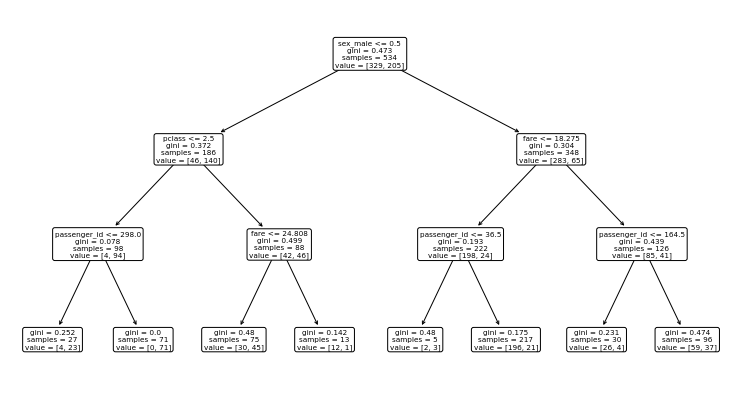

In [9]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=x_train.columns, rounded=True)

In [10]:
y_pred = pd.DataFrame({'survived': y_train,'baseline': 0, 'model_1':clf.predict(x_train)})
y_pred

,survived,baseline,model_1
455,1,0,0
380,1,0,1
492,0,0,0
55,1,0,0
243,0,0,0
...,...,...,...
695,0,0,0
128,1,0,1
636,0,0,0
222,0,0,0


In [11]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.90322581, 0.09677419],
       [0.        , 1.        ],
       [0.61458333, 0.38541667],
       [0.86666667, 0.13333333],
       [0.90322581, 0.09677419]])

In [12]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [13]:
confusion_matrix(y_pred.survived, y_pred.model_1)

array([[293,  36],
       [ 63, 142]])

In [14]:
print(classification_report(y_pred.survived,y_pred.model_1))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



This model 1 is not overfit, with a accuracy about 82%.

In [15]:
pd.DataFrame(confusion_matrix(y_pred.survived, y_pred.model_1), index=['actual_notsurvived','acutal_survived'], columns=['prep_notsurvived','prep_survived'])

,prep_notsurvived,prep_survived
actual_notsurvived,293,36
acutal_survived,63,142


In [16]:
TN = 276
FP = 31
FN = 57
TP = 134

In [17]:
all = TP + FP + FN + TN
acc = (TP + TN) / all

TurePositiveRate = recall = TP/ (TP + FN)

FalsePositiveRate = FP / (FP + TN)

TrueNegativeRate = TN / (TN + FP)

FalseNegativeRate = FN / (FN + TP)

precision = TP / (TP + FP)

f1_score = 2 * (precision*recall) / (precision+recall)

support_pos = TP + FN
support_neg = FP + TN

In [18]:
print('accuracy is:',acc,'Ture Positive Rate is:',TurePositiveRate,'False Positive Rate is:',FalsePositiveRate,'/n',
      'True Negative Rate is:',TrueNegativeRate,'False Negative Rate is:',FalseNegativeRate,'precision is:',precision,'/n',
      'f1_score is:',f1_score,'support_pos is:',support_pos,'support_neg is:',support_neg)

accuracy is: 0.8232931726907631 Ture Positive Rate is: 0.7015706806282722 False Positive Rate is: 0.10097719869706841 /n True Negative Rate is: 0.8990228013029316 False Negative Rate is: 0.29842931937172773 precision is: 0.8121212121212121 /n f1_score is: 0.752808988764045 support_pos is: 191 support_neg is: 307


In [19]:
print(classification_report(y_train, y_pred.model_1))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



In [20]:
# secondtest

In [21]:
clfsecondtest = DecisionTreeClassifier(max_depth=5, random_state=123)
clfsecondtest = clfsecondtest.fit(x_train, y_train)

[Text(0.4375, 0.9166666666666666, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]'),
 Text(0.19078947368421054, 0.75, 'pclass <= 2.5\ngini = 0.372\nsamples = 186\nvalue = [46, 140]'),
 Text(0.10526315789473684, 0.5833333333333334, 'passenger_id <= 298.0\ngini = 0.078\nsamples = 98\nvalue = [4, 94]'),
 Text(0.07894736842105263, 0.4166666666666667, 'passenger_id <= 294.0\ngini = 0.252\nsamples = 27\nvalue = [4, 23]'),
 Text(0.05263157894736842, 0.25, 'fare <= 29.392\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.02631578947368421, 0.08333333333333333, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.07894736842105263, 0.08333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.10526315789473684, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13157894736842105, 0.4166666666666667, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(0.27631578947368424, 0.5833333333333334, 'fare <= 24.808\ngini = 0.499\nsamples = 88\nvalue = [42, 4

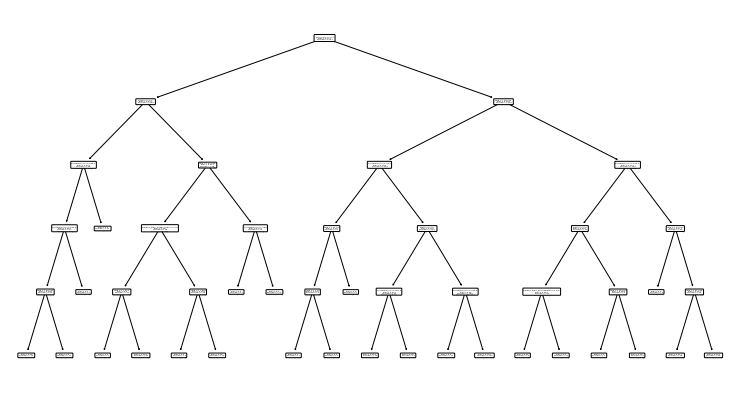

In [22]:
plt.figure(figsize=(13, 7))
plot_tree(clfsecondtest, feature_names=x_train.columns, rounded=True)

In [23]:
y_pred = pd.DataFrame({'survived': y_train,'baseline': 0, 'model_1':clf.predict(x_train),'model_2':clfsecondtest.predict(x_train)})
y_pred

,survived,baseline,model_1,model_2
455,1,0,0,0
380,1,0,1,1
492,0,0,0,0
55,1,0,0,1
243,0,0,0,0
...,...,...,...,...
695,0,0,0,0
128,1,0,1,0
636,0,0,0,0
222,0,0,0,0


In [24]:
y_pred_proba = clfsecondtest.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.89677419, 0.10322581],
       [0.        , 1.        ],
       [0.703125  , 0.296875  ],
       [0.4       , 0.6       ],
       [0.89677419, 0.10322581]])

In [25]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clfsecondtest.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [26]:
confusion_matrix(y_pred.survived, y_pred.model_2)

array([[306,  23],
       [ 61, 144]])

In [27]:
print(classification_report(y_pred.survived,y_pred.model_2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       329
           1       0.86      0.70      0.77       205

    accuracy                           0.84       534
   macro avg       0.85      0.82      0.83       534
weighted avg       0.84      0.84      0.84       534



In [28]:
pd.DataFrame(confusion_matrix(y_pred.survived, y_pred.model_2), index=['actual_notsurvived','acutal_survived'], columns=['prep_notsurvived','prep_survived'])

,prep_notsurvived,prep_survived
actual_notsurvived,306,23
acutal_survived,61,144


In [29]:
TN2 = 276
FP2 = 31
FN2 = 57
TP2 = 134

In [30]:
all = TP2 + FP2 + FN2 + TN2
acc2 = (TP2 + TN2) / all

TurePositiveRate2 = recall2 = TP2/ (TP2 + FN2)

FalsePositiveRate2 = FP2 / (FP2 + TN2)

TrueNegativeRate2 = TN2 / (TN2 + FP2)

FalseNegativeRate2 = FN2 / (FN2 + TP2)

precision2 = TP2 / (TP2 + FP2)

f1_score2 = 2 * (precision2*recall2) / (precision2+recall2)

support_pos2 = TP2 + FN2
support_neg2 = FP2 + TN2

In [31]:
print('accuracy is:',acc2,'Ture Positive Rate is:',TurePositiveRate2,'False Positive Rate is:',FalsePositiveRate2,'/n',
      'True Negative Rate is:',TrueNegativeRate2,'False Negative Rate is:',FalseNegativeRate2,'precision is:',precision2,'/n',
      'f1_score is:',f1_score2,'support_pos is:',support_pos2,'support_neg is:',support_neg2)

accuracy is: 0.8232931726907631 Ture Positive Rate is: 0.7015706806282722 False Positive Rate is: 0.10097719869706841 /n True Negative Rate is: 0.8990228013029316 False Negative Rate is: 0.29842931937172773 precision is: 0.8121212121212121 /n f1_score is: 0.752808988764045 support_pos is: 191 support_neg is: 307


In [32]:
print(classification_report(y_train, y_pred.model_2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       329
           1       0.86      0.70      0.77       205

    accuracy                           0.84       534
   macro avg       0.85      0.82      0.83       534
weighted avg       0.84      0.84      0.84       534



Validate the first model

In [33]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_validate, y_validate)))
y_pred = clf.predict(x_validate)
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on validate set: 0.79
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.74      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.78       178



In [34]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clfsecondtest.score(x_validate, y_validate)))
y_pred = clfsecondtest.predict(x_validate)
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on validate set: 0.74
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       110
           1       0.69      0.59      0.63        68

    accuracy                           0.74       178
   macro avg       0.73      0.71      0.72       178
weighted avg       0.74      0.74      0.74       178



In-sample data is the second model performed better and the The second model works better than the first model

## Telco dataset

In [35]:
telco_df=acquire.get_telco_data()
prep_telco=prepare.prep_telco(telco_df)
telco_train,telco_validate,telco_test=prepare.split_telco(prep_telco)

In [36]:
telco_train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,online_backup.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
440,0643-OKLRP,1,47,80.35,3825.85,Yes,Yes,2,Yes,No,...,0,0,0,0,0,0,1,1,0,0
67,0112-QWPNC,0,49,84.35,4059.35,Yes,Yes,1,Yes,No,...,1,0,1,0,1,0,1,0,0,1
600,0877-SDMBN,0,54,103.95,5639.05,Yes,Yes,2,Yes,No,...,0,0,1,0,1,1,1,1,0,0
4883,9993-LHIEB,0,67,67.85,4627.65,Yes,No,1,Yes,No,...,1,0,0,0,1,0,0,0,0,1
1258,2455-USLMV,0,31,84.75,2613.40,Yes,Yes,2,Yes,No,...,0,0,0,0,0,1,0,1,0,0


In [37]:
telco_train.info()
telco_train.drop(columns=['customer_id','internet_service_type_id.1','contract_type_id.1','payment_type_id.1','internet_service_type_id.2','monthly_charges.1','total_charges.1'],inplace=True)
telco_validate.drop(columns=['customer_id','internet_service_type_id.1','contract_type_id.1','payment_type_id.1','internet_service_type_id.2','monthly_charges.1','total_charges.1'],inplace=True)
telco_test.drop(columns=['customer_id','internet_service_type_id.1','contract_type_id.1','payment_type_id.1','internet_service_type_id.2','monthly_charges.1','total_charges.1'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   phone_service.1                        4225 non-null   object 
 6   multiple_lines.1                       4225 non-null   object 
 7   internet_service_type_id.1             4225 non-null   int64  
 8   online_security.1                      4225 non-null   object 
 9   online_backup.1                        4225 non-null   object 
 10  device_protection.1                    4225 non-null   object 
 11  te

In [38]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   float64
 3   total_charges                          4225 non-null   float64
 4   phone_service.1                        4225 non-null   object 
 5   multiple_lines.1                       4225 non-null   object 
 6   online_security.1                      4225 non-null   object 
 7   online_backup.1                        4225 non-null   object 
 8   device_protection.1                    4225 non-null   object 
 9   tech_support.1                         4225 non-null   object 
 10  streaming_tv.1                         4225 non-null   object 
 11  st

In [39]:
telco_train.churn_Yes.mode()

0    0
Name: churn_Yes, dtype: uint8

In [40]:
telco_x_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_x_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_x_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

In [41]:
(telco_y_train==0).mean()

0.7311242603550295

The baseline is not churn, and the accuracy is .73

In [42]:
clf_telco = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_telco = clf_telco.fit(telco_x_train, telco_y_train)

[Text(0.5, 0.875, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.393\nsamples = 4225\nvalue = [3089, 1136]'),
 Text(0.25, 0.625, 'tenure <= 5.5\ngini = 0.24\nsamples = 2328\nvalue = [2003, 325]'),
 Text(0.125, 0.375, 'internet_service_type_None <= 0.5\ngini = 0.462\nsamples = 461\nvalue = [294, 167]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 266\nvalue = [140, 126]'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 195\nvalue = [154, 41]'),
 Text(0.375, 0.375, 'tenure <= 25.5\ngini = 0.155\nsamples = 1867\nvalue = [1709, 158]'),
 Text(0.3125, 0.125, 'gini = 0.25\nsamples = 649\nvalue = [554, 95]'),
 Text(0.4375, 0.125, 'gini = 0.098\nsamples = 1218\nvalue = [1155, 63]'),
 Text(0.75, 0.625, 'tenure <= 17.5\ngini = 0.489\nsamples = 1897\nvalue = [1086, 811]'),
 Text(0.625, 0.375, 'tenure <= 2.5\ngini = 0.43\nsamples = 677\nvalue = [212, 465]'),
 Text(0.5625, 0.125, 'gini = 0.273\nsamples = 208\nvalue = [34, 174]'),
 Text(0.6875, 0.125, 'gini = 0.471\nsamples = 469\nvalue = [178,

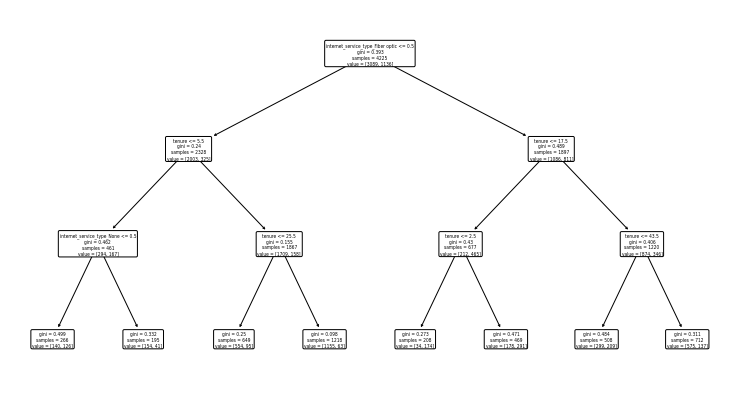

In [43]:
plt.figure(figsize=(13, 7))
plot_tree(clf_telco, feature_names=telco_x_train.columns, rounded=True)

In [48]:
telco_y_pred = pd.DataFrame({'churn': telco_y_train,'baseline': 0, 'model_1':clf_telco.predict(telco_x_train)})
telco_y_pred

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,0,0,0
1258,0,0,0
...,...,...,...
1794,0,0,0
817,0,0,0
901,0,0,0
1987,0,0,1


In [49]:
y_pred_proba = clf_telco.predict_proba(telco_x_train)
y_pred_proba[0:5]

array([[0.80758427, 0.19241573],
       [0.94827586, 0.05172414],
       [0.80758427, 0.19241573],
       [0.94827586, 0.05172414],
       [0.58858268, 0.41141732]])

In [50]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_telco.score(telco_x_train, telco_y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [51]:
confusion_matrix(telco_y_pred.churn, telco_y_pred.model_1)

array([[2877,  212],
       [ 671,  465]])

In [52]:
print(classification_report(telco_y_pred.churn,telco_y_pred.model_1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3089
           1       0.69      0.41      0.51      1136

    accuracy                           0.79      4225
   macro avg       0.75      0.67      0.69      4225
weighted avg       0.78      0.79      0.77      4225



In [53]:
pd.DataFrame(confusion_matrix(telco_y_pred.churn, telco_y_pred.model_1), index=['actual_notchurn','acutal_churn'], columns=['prep_notchurn','prep_churn'])

,prep_notchurn,prep_churn
actual_notchurn,2877,212
acutal_churn,671,465


In [54]:
telco_TN = 2877
telco_FP = 212
telco_FN = 671
telco_TP = 465

In [55]:
telco_all = telco_TP + telco_FP + telco_FN + telco_TN
telco_acc = (telco_TP + telco_TN) / telco_all

telco_TurePositiveRate = telco_recall = telco_TP/ (telco_TP + telco_FN)

telco_FalsePositiveRate = telco_FP / (telco_FP + telco_TN)

telco_TrueNegativeRate = telco_TN / (telco_TN + telco_FP)

telco_FalseNegativeRate = telco_FN / (telco_FN + telco_TP)

telco_precision = telco_TP / (telco_TP + telco_FP)

telco_f1_score = 2 * (telco_precision*telco_recall) / (telco_precision+telco_recall)

telco_support_pos = telco_TP + telco_FN
telco_support_neg = telco_FP + telco_TN

In [56]:
print('accuracy is:',telco_acc,'Ture Positive Rate is:',telco_TurePositiveRate,'False Positive Rate is:',telco_FalsePositiveRate,'/n',
      'True Negative Rate is:',telco_TrueNegativeRate,'False Negative Rate is:',telco_FalseNegativeRate,'precision is:',telco_precision,'/n',
      'f1_score is:',telco_f1_score,'support_pos is:',telco_support_pos,'support_neg is:',telco_support_neg)

accuracy is: 0.7910059171597633 Ture Positive Rate is: 0.40933098591549294 False Positive Rate is: 0.06863062479766915 /n True Negative Rate is: 0.9313693752023309 False Negative Rate is: 0.590669014084507 precision is: 0.6868537666174298 /n f1_score is: 0.51296194153337 support_pos is: 1136 support_neg is: 3089


In [57]:
print(classification_report(telco_y_train, telco_y_pred.model_1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3089
           1       0.69      0.41      0.51      1136

    accuracy                           0.79      4225
   macro avg       0.75      0.67      0.69      4225
weighted avg       0.78      0.79      0.77      4225



# random forest

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [81]:
clf.score(x_train,y_train)

0.8146067415730337

In [63]:
y_predict=rf.predict(x_train)

In [65]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       329
           1       1.00      0.92      0.96       205

    accuracy                           0.97       534
   macro avg       0.98      0.96      0.97       534
weighted avg       0.97      0.97      0.97       534



In [66]:
confusion_matrix(y_train,y_predict)

array([[329,   0],
       [ 17, 188]])

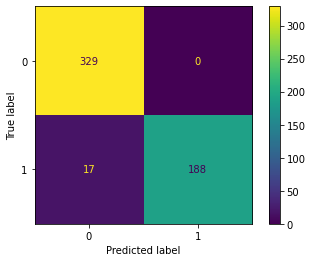

In [73]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_predict),display_labels=rf.classes_).plot()

In [77]:
TN = 329
FP = 0
FN = 12
TP = 188

In [79]:
all = TP + FP + FN + TN
acc = (TP + TN) / all

TurePositiveRate = recall = TP/ (TP + FN)

FalsePositiveRate = FP / (FP + TN)

TrueNegativeRate = TN / (TN + FP)

FalseNegativeRate = FN / (FN + TP)

precision = TP / (TP + FP)

f1_score = 2 * (precision*recall) / (precision+recall)

support_pos = TP + FN
support_neg = FP + TN

In [80]:
print('accuracy is:',acc,'Ture Positive Rate is:',TurePositiveRate,'False Positive Rate is:',FalsePositiveRate,'/n',
      'True Negative Rate is:',TrueNegativeRate,'False Negative Rate is:',FalseNegativeRate,'precision is:',precision,'/n',
      'f1_score is:',f1_score,'support_pos is:',support_pos,'support_neg is:',support_neg)

accuracy is: 0.9773156899810964 Ture Positive Rate is: 0.94 False Positive Rate is: 0.0 /n True Negative Rate is: 1.0 False Negative Rate is: 0.06 precision is: 1.0 /n f1_score is: 0.9690721649484536 support_pos is: 200 support_neg is: 329


In [76]:
for model in range (2,11):
    rf=RandomForestClassifier(max_depth=model, random_state=123)
    rf=rf.fit(x_train,y_train)
    y_predict=rf.predict(x_train)
    print('model depth',model)
    print(classification_report(y_train, y_predict))

model depth 2
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       329
           1       0.84      0.63      0.72       205

    accuracy                           0.81       534
   macro avg       0.82      0.78      0.79       534
weighted avg       0.81      0.81      0.80       534

model depth 3
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       329
           1       0.87      0.64      0.74       205

    accuracy                           0.83       534
   macro avg       0.84      0.79      0.81       534
weighted avg       0.83      0.83      0.82       534

model depth 4
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       329
           1       0.88      0.67      0.76       205

    accuracy                           0.84       534
   macro avg       0.85      0.81      0.82       534
weighted avg       0.84      0.8

In [93]:
model=[]
for num in range (2,25):
    rf=RandomForestClassifier(max_depth=num,random_state=123)
    rf=rf.fit(x_train,y_train)
    train_accuracy=rf.score(x_train,y_train)
    validate_accuracy=rf.score(x_validate,y_validate)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.810861,0.786517,0.024345
1,3,0.827715,0.792135,0.035581
2,4,0.838951,0.808989,0.029963
3,5,0.868914,0.803371,0.065543
4,6,0.902622,0.797753,0.104869
5,7,0.926966,0.797753,0.129213
6,8,0.949438,0.775281,0.174157
7,9,0.960674,0.758427,0.202247
8,10,0.968165,0.769663,0.198502
9,11,0.975655,0.764045,0.211610


In [94]:
# increasing leaf and decreasing max_depth

In [100]:
model=[]
max_depth=25
for num in range (2,max_depth):
    mdepth=max_depth-num
    min_leaf=num
    rf=RandomForestClassifier(max_depth=mdepth,min_samples_leaf=min_leaf,random_state=123)
    rf=rf.fit(x_train,y_train)
    train_accuracy=rf.score(x_train,y_train)
    validate_accuracy=rf.score(x_validate,y_validate)
    result = {
        'min_samples_leaf':min_leaf,
        'max_depth': mdepth,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,23,0.925094,0.786517,0.138577
1,3,22,0.898876,0.797753,0.101124
2,4,21,0.883895,0.792135,0.091760
3,5,20,0.867041,0.792135,0.074906
4,6,19,0.852060,0.786517,0.065543
5,7,18,0.846442,0.797753,0.048689
6,8,17,0.835206,0.803371,0.031835
7,9,16,0.844569,0.797753,0.046816
8,10,15,0.842697,0.797753,0.044944
9,11,14,0.838951,0.797753,0.041199


## key takeaway
the best model for increasing sample leaf while decreasing max_depth is model 16. the training model 0 perform the best while it has increased difference with validation, therefore, it is potentially overfitted.
model 6 has the other better performance with small difference with validation. Therefore, if the model 6 is our secondary option.

In [102]:
from sklearn.neighbors import KNeighborsClassifier


In [104]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
y_pred= knn.predict(x_train)
y_valid=knn.predict(x_validate)

In [108]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [117]:
model=[]
for num in range (2,20):
    knn = KNeighborsClassifier(n_neighbors=num, weights='uniform')
    knn=knn.fit(x_train, y_train)
    train_accuracy=knn.score(x_train,y_train)
    validate_accuracy=knn.score(x_validate,y_validate)
    train_classification=classification_report(y_train,y_predict)
    validate_classification=classification_report(y_validate,y_valid)
    trai_df=pd.DataFrame(train_classification)
    valid_df=pd.DataFrame(validate_classification)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy,
        'train_rep':train_df.precision,
        'validate_rep':valid_df.precision
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

ValueError: DataFrame constructor not properly called!